## COMP5721M: Programming for Data Science 

## Group project (Coursework 2): Data Analysis Project


# Analysing mental health in the tech industry


_Give names and emails of group members here:_

* Stephen McGuinness, zmmh2430@leeds.ac.uk
* Yuchen Sun, xvws5109@leeds.ac.uk
* Xiao Tan, rdjl5698@leeds.ac.uk
* Yuanlin Zhou, psvh7734@leeds.ac.uk

# Project Plan

## The Data

### Data Description

The dataset was collected from [Kaggle](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data) and attributed to a non-profit organisation named OSMI (Open Source Mental Health). The data itself is a tech survey from 2014 on mental health. There are 27 columns and 1260 responses with data capture demographics (age, gender, country), employment type (self-employed, company size), time stamps and information on workplace mental health resources (benefits, wellness programs, leave policies). 

### Accuracy and Reliability

The organisation's history in sampling relies on individuals self-reporting their experiences through an online tech-survey held on their website. Security mechanisms to verify whether these individuals do work in the tech sector are nonexistent. Regardless of this fault, self-reported surveys, in general, contain several biases, e.g. language and culture differences along with sampling bias affecting data reliability. 

-   **Sampling Bias**: The survey was freely available on their website for the public to self-report. This means, individuals with a pre-existing interest in mental health are likely to report on past experiences or are currently experiencing said conditions (Bauhoff, 2023).

- **Cultural differences**: The survey was global, with respondents located in 48 unique countries. Each culture may attribute a different meaning on what constitutes as mental health support, benefits or wellness programs. Potentially leading to question misinterpretation, e.g. Has your employer ever discussed mental health as part of an employee wellness program? This could mean formal presentations or seminars on mental health in some countries, while for others, it might mean regular check-ins or informal discussions with their manager (globalEdge, 2018).
In addition to this, the lack of security mechanisms does introduce the possibility of the risk of false responses where individuals may intentionally skew results in favour of a particular outcome. 
### Data Quality and Usability

Kaggle provides this dataset with an 8.82 usability score out of 10. The aim of these scores indicates the clarity, completeness and regularity of updates of datasets on their platform (Cher, 2024). The data itself contains numerous missing values, e.g. the ```self_employed``` column contains 18 values and ```work_inteference``` column contains 264 missing values. In addition, the ```age``` column contains erroneous results with a min age -1726 and a max age indicating 99999999999. Despite these issues, the dataset’s combination of categorical, binary, e.g., treatment, family_history, and continuous variables, e.g. age ensures suitability for classification tasks, e.g. predicting the likelihood of seeking mental health treatment (Fu, 2010).


## Project Aim and Objectives


### Aim 
Given that latest forecasts indicate 62 million individuals are currently employed in tech sector (Mitravinda et al., 2023) there is a need to analyse workplace factors which could result in a negative working environment. This project, therefore, aims to analyse employee mental health and support, across small, medium and large business. This is achieved by data-driven insights and visualization which explores variables that affect employees comfort in seeking mental health treatment. In addition, the project offers organisations an intuitive GUI to help identify employees that may require mental health support - this to ensure early intervention through the application of classification models. 

  ### Objective

- **Objective 1 (Yuchen Sun)**: Clean and process the data sample set, adressing missing values, inconsistencies in column specific areas, e.g. gender and age.

- **Objective 2 (Xiao Tan)**: Identify and visualize trends on mental health openness along with support across various company sizes, focusing on whether these trends differ by age, gender or by company type. 

- **Objective 3 (Yuanlin Zhou)**: Encode data and scale features. Train and evaluate classification models, e.g. Decision Tree and KNN - to predict whether an employee is likely to seek mental health treatment based on specific features. The evaluation stage involves analysing the model's accuracy, recall, and precision through confusion matrix and ROC curve.

- **Objective 4 (Stephen McGuinness)**: Project management (oversee version control using GitHub). Report writing. Developing an intuitive GUI (Graphical User Interface) for organisations to input specific employee attributes and receive predictions on whether they require mental health support. The models employeed for this will be (KNN, Decision Trees, Logistic Regression and SVC).

## System Design


### Architecture
![process.drawio.png](process.drawio.png)


The overall architecture of data processing is shown in the figure. The process begins with importing the data and identifying and addressing outliers. Next, we performed exploratory data analysis (EDA) by visualizing data features using bar charts, pie charts, and histograms to gain insights. Afterward, we encoded the data and scaled the age feature to meet the requirements for training the model. In the model training and evaluation phase, we used a random forest model to assess feature importance, selected features based on the evaluation results and insights from the EDA. Then we trained machine learning models, such as decision tree and k-nearest neighbor. Finally, we evaluated models based on F1 scores and predicted results by trained model. Visualization of the results at each stage is integrated throughout the process, with the visualizations encapsulated in functions for easy reuse.


### Processing Modules and Algorithms

- Data Cleaning: Fill missing values in "self_employed" and "state" columns with "Unknown" using Pandas.
- Encoding Data: Use LabelEncoder from sklearn.preprocessing to convert categorical values into numeric values for model compatibility.
- Feature Selection: Using Random Forest model to evaluate the importance of features.
- Model Training and Evaluation: Create machine learning models, such as decision trees, k-nearest neighbors, and SVC, and evaluate their performance using the F1 score.

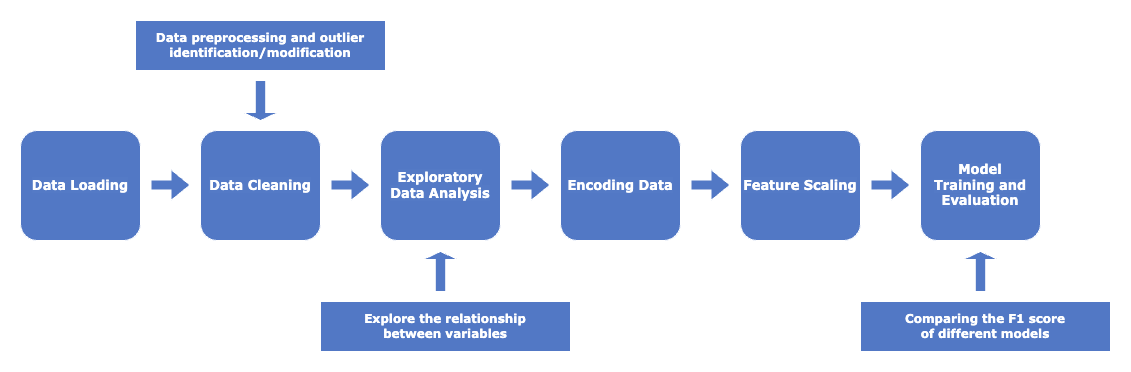

# Program Code

In [296]:
# Import modules

# data processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML

# encoding data and scaling
from sklearn.preprocessing import LabelEncoder # encoding data
from sklearn.preprocessing import MinMaxScaler # scaling

# model training
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# color dictionary
color_dict = {
    'Yes': '#88B04B', 
    'No': '#D64550', 
    'Sometimes': '#E2B659', 
    'Never': '#B6D7A8', 
    'Rarely': '#F5A9B8', 
    'Often': '#D99A6C', 
    "Don't know": '#6D9DC5', 
    'Unknown': '#A4C3D9' 
}

We use pandas to describe and analyze data, matplotlib and seaborn to visualize data, and sklearn for feature selection and data modeling.

## 1. Data Loading

In [297]:
# Loading the dataset
def get_original_data():
    file = './input/survey.csv'
    df = pd.read_csv(file)
    return df

df = get_original_data()

# The num of rows and columns of dataset
print("Data Shape:", df.shape)

# The type of columns
print(df.info())

Data Shape: (1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null

## 2. Data Cleaning

In [298]:
# Remove unused columns
df = df.drop(['Timestamp','Country','state','comments'], axis = 1)
df.head(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


This operation is used to clean up the dataset by removing unnecessary or irrelevant columns, reducing the dataset to only the essential data for analysis.

In [299]:
# Check for null values in each column
columnStr = 'column'
mcStr = 'missing count'
print(f"{columnStr:<25} {mcStr}")

for col in df:
    missing_count = df[col].isnull().sum()
    print(f"{col:<30} {missing_count}")

column                    missing count
Age                            0
Gender                         0
self_employed                  18
family_history                 0
treatment                      0
work_interfere                 264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0


The code is designed to identify missing values in each column of the DataFrame.Missing data will lead lead to issues in data analysis and modeling. This function provides a quick overview of where and how much data is missing. Therefore, understanding the extent of missing values helps determine how to handle them, such as filling, removing, or ignoring, based on the context.

In [300]:
# Assign all empty values to 'NaN'
df['self_employed'] = df['self_employed'].fillna('NaN')
df['work_interfere'] = df['work_interfere'].fillna('NaN')
df.head(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Fulfilling missing values in columns with string words to ensure consistency and avoid issues caused by actual missing values during analysis.

In [301]:
# Replace 'NaN' in 'self_employed' column
print(df['self_employed'].value_counts(), "\n")
df['self_employed'] = df['self_employed'].replace(['NaN'], 'No')

self_employed
No     1095
Yes     146
NaN      18
Name: count, dtype: int64 


This code replaces occurrences of ‘NaN’ in the self_employed column with ‘No’ to standardize the data and improve clarity for analysis.

In [302]:
# Replace 'NaN' in 'work_interfere' column
print(df['work_interfere'].value_counts())
df['work_interfere'] = df['work_interfere'].replace('NaN', 'Unknown')

work_interfere
Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


This code replaces the ‘NaN’ values in the work_interfere column with ‘Unknown’ to make the data more interpretable and consistent for analysis.

Plots work interference distribution: Pre-Cleaning vs Post-Cleaning

In [303]:
def compare_workinterfere_cleaned(df_cleaned):
    df_unclean = get_original_data()
    # Calculate value counts for raw and cleaned data
    uncleaned_counts = df_unclean['work_interfere'].value_counts()
    cleaned_counts = df_cleaned['work_interfere'].value_counts()

    # Create a DataFrame to summarize data before and after cleaning
    compare_df = pd.DataFrame({
        'Before Cleaning': uncleaned_counts,
        'After Cleaning': cleaned_counts
    }).fillna(0)  # Fill missing values with 0

    # Draw group bar chart
    ax = compare_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], edgecolor='black')
    plt.title('Work Interference Distribution: Before vs After Cleaning')
    plt.xlabel('work_interfere')
    plt.ylabel('Count')

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

    # Finalize and display the plot
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

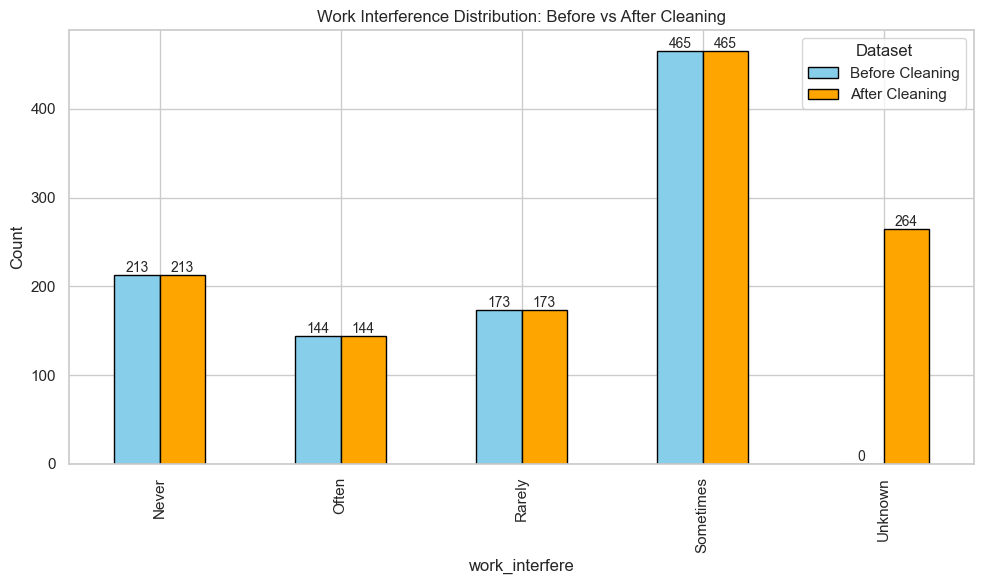

In [304]:
compare_workinterfere_cleaned(df)

This chart compares the distribution of work interference responses before and after data cleaning.

In [305]:
# Clean gender
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'male (cis)', 'cis man', 'Guy']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'female (cis)', 'cis woman']:
        return 'Female'
    elif 'trans' in gender and 'male' in gender:
        return 'transMale'
    elif 'trans' in gender and 'female' in gender:
        return 'transFemale'
    elif gender in ['non-binary', 'nonbinary', 'nb', 'genderqueer', 'gender fluid']:
        return 'Other'
    else:
        return 'Other' 

df['Gender'] = df['Gender'].apply(clean_gender)
print(df['Gender'].value_counts())

Gender
Male         981
Female       244
Other         31
transMale      3
Name: count, dtype: int64


This code standardizes the values in the Gender column by grouping similar entries (e.g., different formats of “male” or “female”) and classifying less common or unclear entries as “Other,” ensuring consistency for analysis.

Plots two bar charts of gender distribution before and after data cleaning

In [306]:
def compare_gender_cleaned(df_cleaned, column_name='Gender'):
    df_unclean = get_original_data()
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Bar chart before cleaning
    ax1 = df_unclean[column_name].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title(f'{column_name} Distribution (Before Cleaning)')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Count')

    # Add data labels to pre-cleaning chart
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

    # Bar chart after cleaning
    ax2 = df_cleaned[column_name].value_counts().plot(kind='bar', ax=axes[1], color='green', edgecolor='black')
    axes[1].set_title(f'{column_name} Distribution (After Cleaning)')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Count')

    # Add data labels to the cleaned chart
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

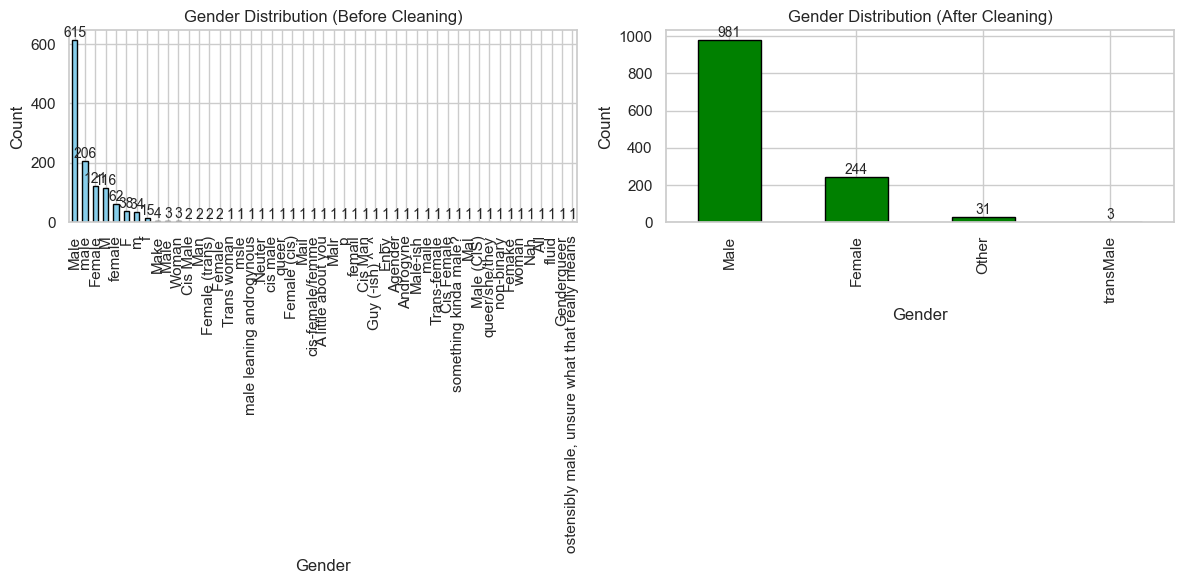

In [307]:
compare_gender_cleaned(df)

This chart compares the gender distribution before and after data cleaning, showing the consolidation of diverse entries into standardized categories.

In [308]:
# Clean age
print("min age", df['Age'].min())
print("max age", df['Age'].max())

# Identify outliers
age_median = df['Age'].median()
outlier_condition = (df['Age'] <= 10) | (df['Age'] >= 100)
print("number of outliers:", outlier_condition.sum())

# Replace outliers with NaN, then fill with median
df.loc[outlier_condition, 'Age'] = np.nan
df['Age'] = df['Age'].fillna(age_median)

print("min age", df['Age'].min())
print("max age", df['Age'].max())

min age -1726
max age 99999999999
number of outliers: 7
min age 11.0
max age 72.0


This code cleans the Age column by replacing outliers (ages ≤18 and ≥100) with the median age, ensuring the data remains consistent and realistic. Using the median instead of directly filtering out outliers is beneficial because it preserves the completeness of the dataset and minimizes bias. The median is robust to extreme values, making it a reliable replacement that reflects the central tendency of the data.

Plots a bar graphs of age distribution: Pre-Cleaning vs Post-Cleaning

In [309]:
def compare_age_cleaned(df_cleaned, age_min=10, age_max=100):
    # Load raw data
    df_unclean = get_original_data()

    # Filter normal and outlier data for raw and cleaned datasets
    normal_raw = df_unclean[(df_unclean['Age'] >= age_min) & (df_unclean['Age'] <= age_max)]

    normal_cleaned = df_cleaned[(df_cleaned['Age'] >= age_min) & (df_cleaned['Age'] <= age_max)]

    # Plot normal age distributions
    plt.hist(normal_raw['Age'], bins=20, alpha=0.5, label='Normal (Before Cleaning)', color='blue', edgecolor='black')
    plt.hist(normal_cleaned['Age'], bins=20, alpha=0.5, label='Normal (After Cleaning)', color='green', edgecolor='black')
    plt.title('Normal Age Distribution: Before vs After Cleaning')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

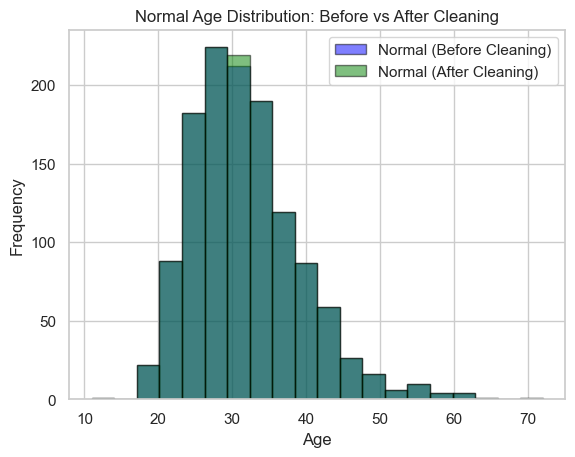

In [310]:
compare_age_cleaned(df)

The chart highlights how data cleaning helps concentrate the age distribution within a defined range, improving the accuracy of the dataset.

## 3. Exploratory Data Analysis

This part generates a bar chart of gender distribution in the dataset.

In [311]:
def visualize_gender_distribution(df):
    plt.figure(figsize=(5, 3))
    # Plotting gender distribution in order of Male, Female, transMale, transFemale, Other
    sns.countplot(data=df, x='Gender', order=['Male', 'Female', 'transMale', 'transFemale', 'Other']) 
    plt.title("Gender Distribution After Cleaning")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

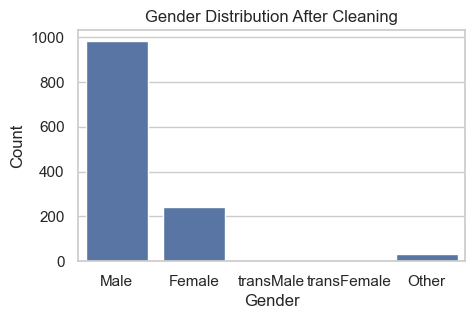

In [312]:
visualize_gender_distribution(df)

This part plots a histogram of the age distribution.

In [313]:
def visualize_age_distribution(df):
    # Set the background style to white grid
    sns.set(style="whitegrid") 
    plt.figure(figsize=(7, 3.5))
    # Plot histogram of age distribution with KDE using 30 bars
    sns.histplot(df['Age'], kde=True, bins=30) 
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

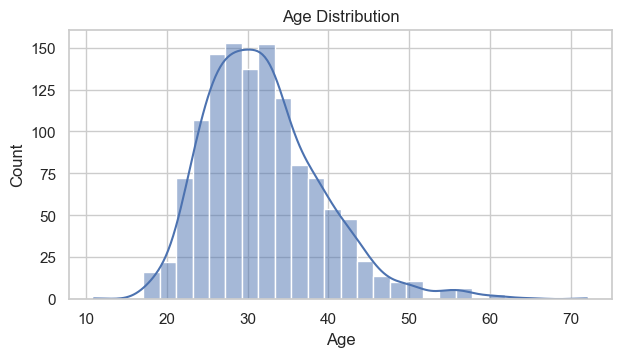

In [314]:
visualize_age_distribution(df)

This part plots pie charts of the relationship between gender and sought treatment.

In [315]:
def visualize_pie_charts_by_gender(df, color_dict):
    gender_categories = ['Male', 'Female', 'transMale', 'Other']
    # Filter data by gender categories
    t_df = df[df['Gender'].isin(gender_categories)] 
    plt.figure(figsize=(9, 5))
    for i, gender in enumerate(gender_categories, 1):
        # Create a subplot for each gender
        plt.subplot(2, 3, i) 
        treatment_counts = t_df[t_df['Gender'] == gender]['treatment'].value_counts() # Count the treatment status by gender
        colors = [color_dict[label] for label in treatment_counts.index]
        plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"Mental Health Treatment - {gender}")
    plt.tight_layout()
    plt.show()

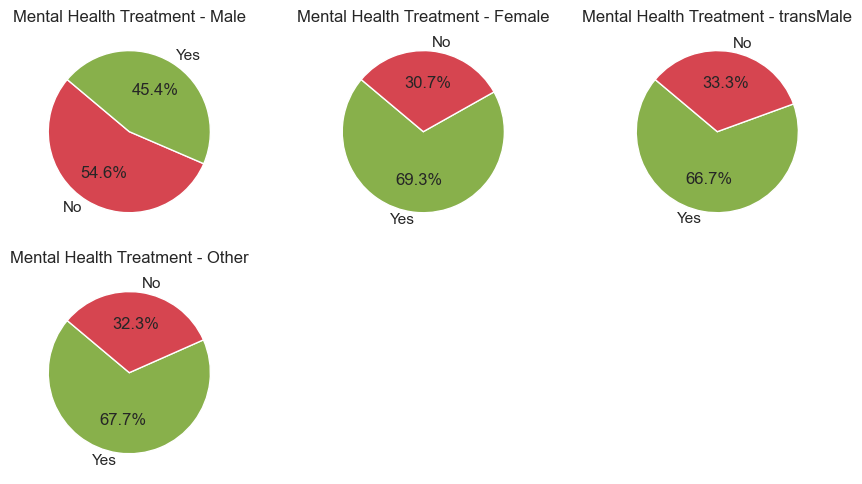

In [316]:
visualize_pie_charts_by_gender(df, color_dict)

This part plots pie charts of the relationship between gender and work interference.

In [317]:
def visualize_work_interference(df, color_dict):
    plt.figure(figsize=(10, 6))
    gender_categories = ['Male', 'Female', 'transMale', 'Other']
    for i, gender in enumerate(gender_categories, 1):
        plt.subplot(2, 3, i)
        # Count work interference by gender
        interfere_counts = df[df['Gender'] == gender]['work_interfere'].value_counts() 
        colors = [color_dict[label] for label in interfere_counts.index]
        plt.pie(interfere_counts, labels=interfere_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"Work Interference - {gender}")
    plt.tight_layout()
    plt.show()

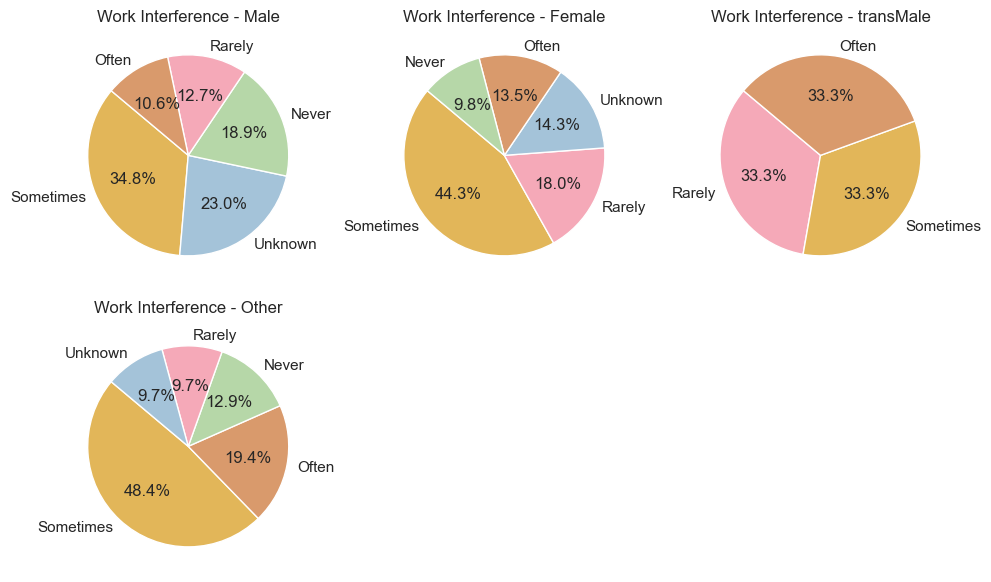

In [318]:
visualize_work_interference(df, color_dict)

This part divides the age data into age groups by predefined intervals and defines the order in which the company size is categorized.

In [319]:
# Define the boundaries of age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

# Group the age column 'Age' by the defined boundaries and store the results in a new column 'age_group'
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Define the boundaries of company size
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

This part generates stacking bars to show the distribution of the proportion of work interfered with by mental health in different age groups.

In [320]:
def visualize_age_group_distribution(df, bins, labels, color_dict):    
    # Group data by age group and work interference, then count occurrences
    age_group_counts = df.groupby(['age_group', 'work_interfere'], observed=False).size().unstack(fill_value=0) 
    age_group_totals = age_group_counts.sum(axis=1)
    # Calculate the percentage for each category within each age group
    age_group_percentages = age_group_counts.div(age_group_totals, axis=0) 
    age_group_percentages.plot(kind='bar', stacked=True, figsize=(8, 5), color=[color_dict[label] for label in age_group_counts.columns])
    plt.title("Work Interference by Age Group (Proportion)", fontsize=14)
    plt.xlabel("Age Group", fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.legend(title="Work Interference", loc='upper left', bbox_to_anchor=(1, 1))
    # Set x-axis tick labels orientation
    plt.xticks(rotation=0) 
    plt.tight_layout()
    plt.show()

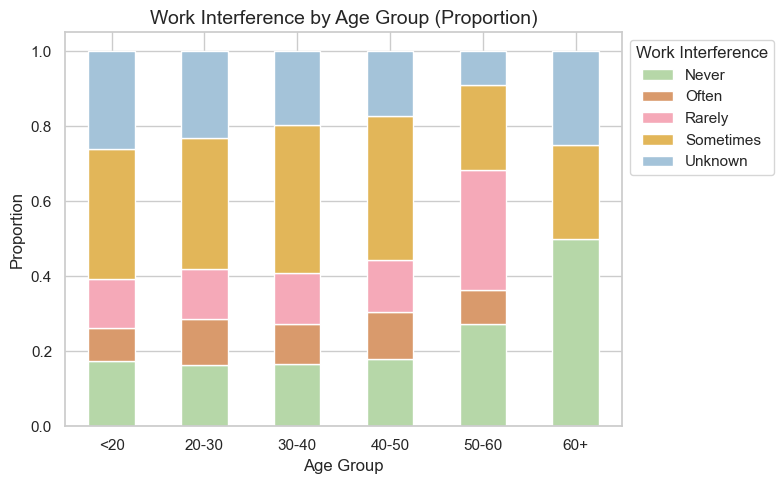

In [321]:
visualize_age_group_distribution(df, bins, labels, color_dict)

This part shows the relationship between different company sizes and the provision of mental health benefits through a set of pie charts.

In [322]:
def visualize_company_size_vs_benefits(df, employee_order, color_dict):
    fig, axes = plt.subplots(2, 3, figsize=(9, 5))
    fig.suptitle("Mental Health Benefits by Company Size")
    # Iterate through company sizes
    for i, size in enumerate(employee_order):
        data_size = df[df['no_employees'] == size]
        benefit_counts = data_size['benefits'].value_counts()
        colors = [color_dict[label] for label in benefit_counts.index]
        # Select the subplot based on the current index
        ax = axes[i // 3, i % 3]
        ax.pie(benefit_counts, labels=benefit_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
        ax.set_title(f"Company Size: {size}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

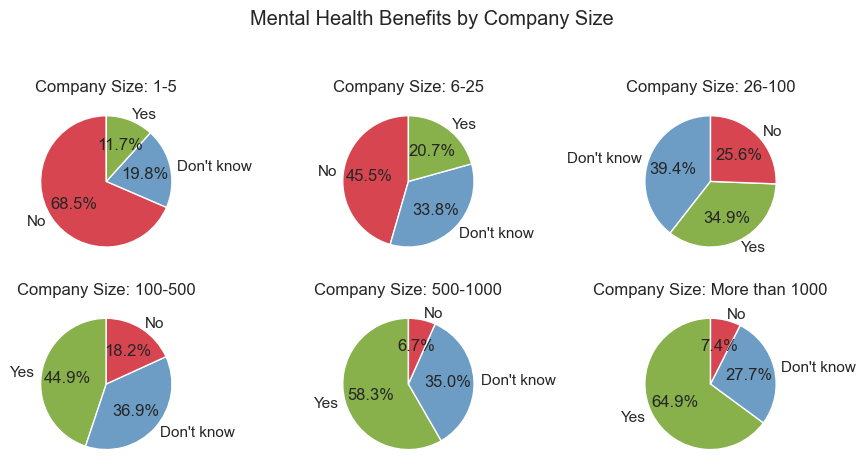

In [323]:
visualize_company_size_vs_benefits(df, employee_order, color_dict)

This part shows the relationship between having a family mental health history and sought mental health treatment by grouping bars.

In [324]:
def visualize_family_history_vs_treatment(df, color_dict):
    plt.figure(figsize=(6, 3))
    colors = [color_dict.get(label) for label in ['Yes', 'No']]
    sns.countplot(data=df, x='family_history', hue='treatment', palette=colors)
    plt.title("Family History vs. Mental Health Treatment")
    plt.xlabel("Family History")
    plt.ylabel("Count")
    plt.show()

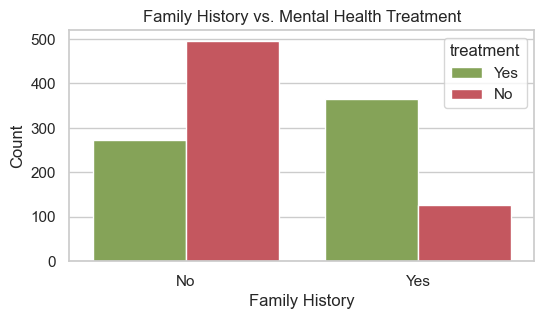

In [325]:
visualize_family_history_vs_treatment(df, color_dict)

This part shows the percentage distribution of whether different company types offer mental health benefits by stacking percentage bars.

In [326]:
def visualize_tech_vs_benefits(df, color_dict):
    # Group data by 'tech_company' and 'benefits' and count the occurrences
    benefit_counts = df.groupby(['tech_company', 'benefits']).size().unstack(fill_value=0)
    benefit_percentages = benefit_counts.div(benefit_counts.sum(axis=1), axis=0)
    colors = [color_dict[label] for label in benefit_counts.index]
    benefit_percentages.plot(kind='bar', stacked=True, figsize=(8, 4), 
                             color=[color_dict[label] for label in ["Don't know", "No", "Yes"]])
    plt.title("Tech Company vs. Access to Mental Health Benefits (Proportion)", fontsize=14)
    plt.xlabel("Tech Company", fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    # Set x-axis tick labels orientation
    plt.xticks(rotation=0) 
    plt.legend(title="Benefits", loc='upper right')
    plt.tight_layout()
    plt.show()

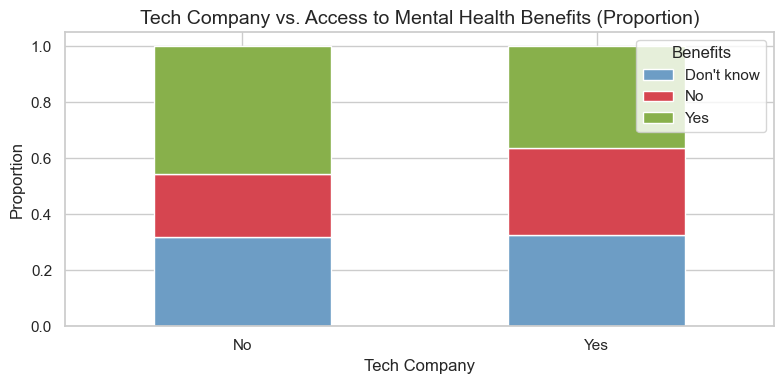

In [327]:
visualize_tech_vs_benefits(df, color_dict)

## 4. Encoding Data

In [328]:
# Create a copy of cleaned dataset
train_df = df.copy()
# Store the mapping between column value and encoded data
encoded_value_mapping = {}

for col in train_df:
    label_encoder = LabelEncoder()
    label_encoder.fit(train_df[col])
    # Assign encoded data to df
    train_df[col] = label_encoder.transform(train_df[col])
    encoded_value_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

train_df.head(5)
for k, v in encoded_value_mapping.items():
    print(k, v)

Age {np.float64(11.0): np.int64(0), np.float64(18.0): np.int64(1), np.float64(19.0): np.int64(2), np.float64(20.0): np.int64(3), np.float64(21.0): np.int64(4), np.float64(22.0): np.int64(5), np.float64(23.0): np.int64(6), np.float64(24.0): np.int64(7), np.float64(25.0): np.int64(8), np.float64(26.0): np.int64(9), np.float64(27.0): np.int64(10), np.float64(28.0): np.int64(11), np.float64(29.0): np.int64(12), np.float64(30.0): np.int64(13), np.float64(31.0): np.int64(14), np.float64(32.0): np.int64(15), np.float64(33.0): np.int64(16), np.float64(34.0): np.int64(17), np.float64(35.0): np.int64(18), np.float64(36.0): np.int64(19), np.float64(37.0): np.int64(20), np.float64(38.0): np.int64(21), np.float64(39.0): np.int64(22), np.float64(40.0): np.int64(23), np.float64(41.0): np.int64(24), np.float64(42.0): np.int64(25), np.float64(43.0): np.int64(26), np.float64(44.0): np.int64(27), np.float64(45.0): np.int64(28), np.float64(46.0): np.int64(29), np.float64(47.0): np.int64(30), np.float64(48

## 5. Feature Scaling

Age is different from other columns, needs to be scaled.

In [329]:
scaler = MinMaxScaler()

# scaling Age
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
0,0.444444,0,0,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,1
1,0.600000,1,0,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.333333,1,0,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,1
3,0.311111,1,0,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,1
4,0.311111,1,0,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,1


## 6.Model Training and Evaluation

### Feature Selection

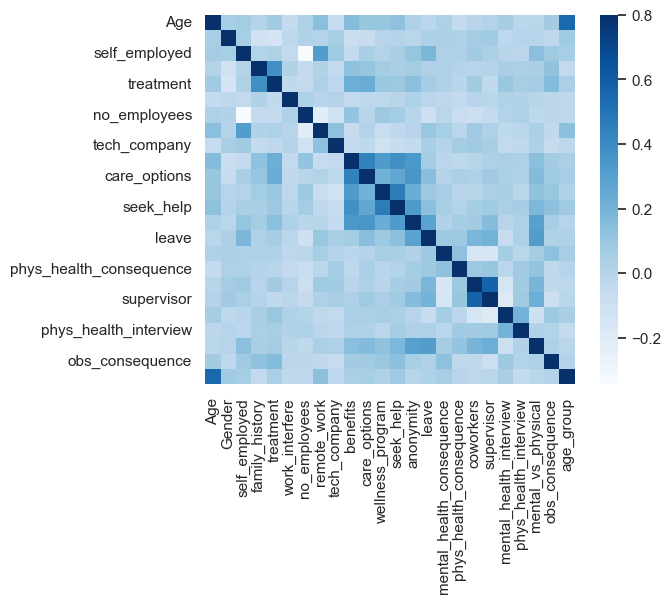

In [330]:
def visualize_coefficient_matrix():
    # Correlation Coefficient Matrix
    corrmat = train_df.corr()
    # Draw a heat map
    sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues");
    plt.show()
visualize_coefficient_matrix()

Heatmap shows the correlation between different variables.

Then, Use random forest model to evaluate feature importance.

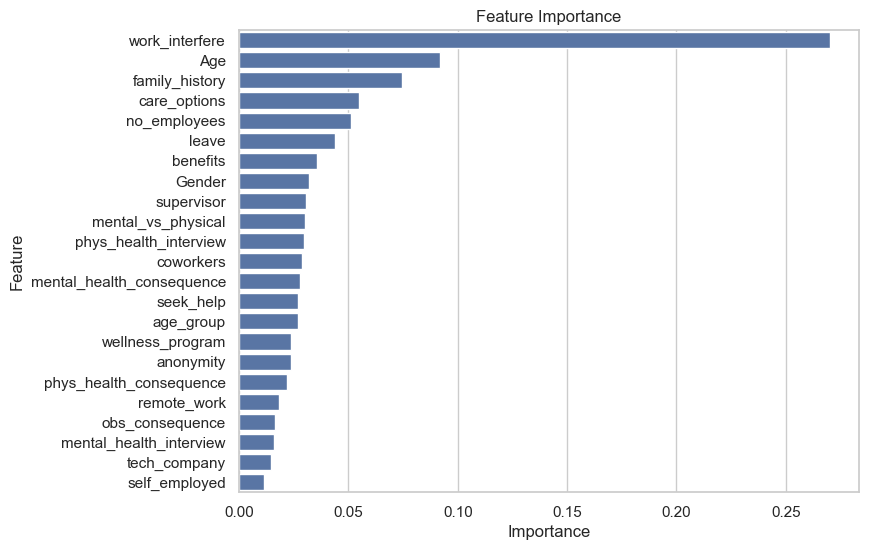

In [331]:
X = train_df.drop('treatment', axis=1)
y = train_df['treatment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

def visualize_feature_importance():
    # Train random forest model
    rf_model = RandomForestClassifier(random_state=88)
    rf_model.fit(X_train, y_train)
    
    # Evaluate feature importance
    importances = rf_model.feature_importances_
    
    # Create DataFrame
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Visualize feature importance
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()

visualize_feature_importance()

Select features based on feature importance.

In [332]:
# Select features
X = train_df[['work_interfere', 'family_history', 'care_options', 'Age', 'no_employees', 'leave', 'benefits', 'Gender']]
y = train_df[['treatment']].values.ravel()
X

,work_interfere,family_history,care_options,Age,no_employees,leave,benefits,Gender
0,1,0,1,0.444444,4,2,2,0
1,2,0,0,0.600000,5,0,0,1
2,2,0,0,0.333333,4,1,1,1
3,1,1,2,0.311111,2,1,1,1
4,0,0,0,0.311111,1,0,2,1
...,...,...,...,...,...,...,...,...
1254,4,0,0,0.200000,2,2,1,1
1255,1,1,2,0.333333,2,1,2,1
1256,3,1,2,0.377778,5,1,2,1
1257,4,0,2,0.644444,1,0,1,0


### Model Evaluation

The treatment column has only two values, 0 and 1, thus we use decision trees, knn, and other machine learning models suitable for binary classification models.

In [333]:
# Models need to be evaluated
models = {
    "Decision Tree" : DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=5, max_depth=10, min_impurity_decrease=0.005),
    "KNN" : KNeighborsClassifier(n_neighbors=17),
    "Logistic Regression": LogisticRegression(),
    "SVC" : SVC(kernel='rbf', random_state=88)
}

# Store model name -> model accuracy 
model_score = {}

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Feature standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_models(X, y):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        # Use cross validation to reduce the risk of overfitting
        f1 = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score)).mean()
        model_score[model_name] = f1
        print("Build", model_name, "model success!")

Evaluate all models.

In [334]:
evaluate_models(X, y)
for model_name, score in model_score.items():
    print(model_name, score)

Build Decision Tree model success!
Build KNN model success!
Build Logistic Regression model success!
Build SVC model success!
Decision Tree 0.8518480676129603
KNN 0.7362069801377799
Logistic Regression 0.6839495188030662
SVC 0.8060075113089937


The Decision Tree model achieved an F1 score of 0.8518, demonstrating strong performance in balancing precision and recall. The SVC model's F1 score was 0.8060, slightly lower than that of the Decision Tree. Both the KNN and Logistic Regression models had F1 scores below 0.75, indicating weaker performance for the current task.

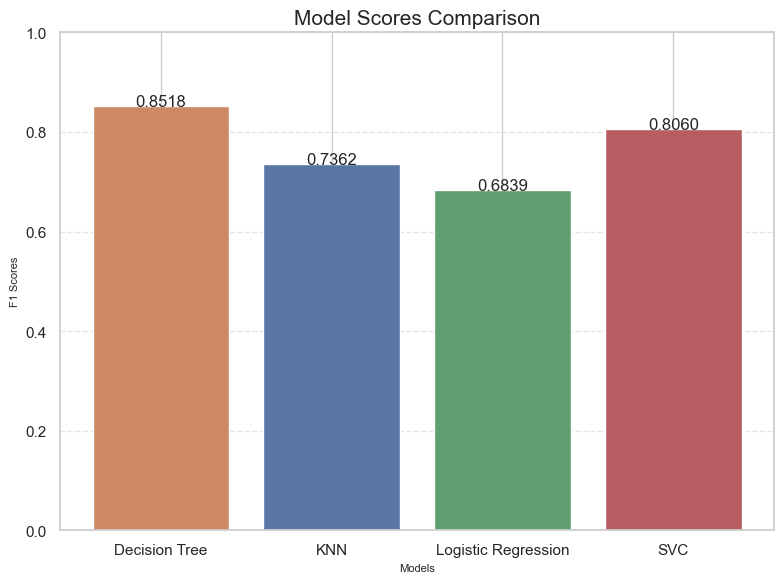

In [335]:
# Visualizing model scores.
def visualize_model_scores():
    model_names = list(model_score.keys())
    scores = list(model_score.values())
    
    # Create a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(model_names, scores, color=['#CC8963','#5975A4','#5F9E6E','#B55D60','#F3EDCD'])
    plt.title('Model Scores Comparison', fontsize=15)
    plt.xlabel('Models', fontsize=8)
    plt.ylabel('F1 Scores', fontsize=8)
    plt.ylim(0, 1)
    
    # Add value labels to columns
    for i, score in enumerate(scores):
        plt.text(i, score, f'{score:.4f}', ha='center', fontsize=12)
    
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

visualize_model_scores()

Visualize Decision Tree.

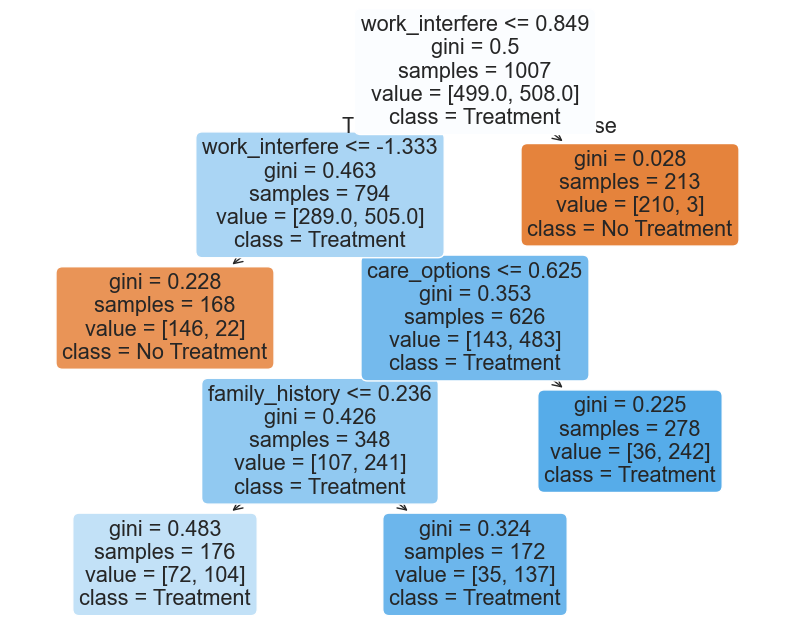

In [336]:
def visualize_decision_tree():
    plt.figure(figsize=(10, 8))
    # Get decision tree model
    decision_tree_model = models['Decision Tree']
    plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['No Treatment', 'Treatment'], rounded=True)
    plt.show()
    
visualize_decision_tree()

Recall = 0.93 indicates that the model has a strong ability to identify people who need mental treatment. Precision = 0.77 indicates that the model has some false positives. Accuracy = 0.82 is an above-average result, indicating the classification ability of model is strong overall.

In [337]:
decision_tree_model = models['Decision Tree']
# Predicting the result
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.82
Precision: 0.77
Recall: 0.93


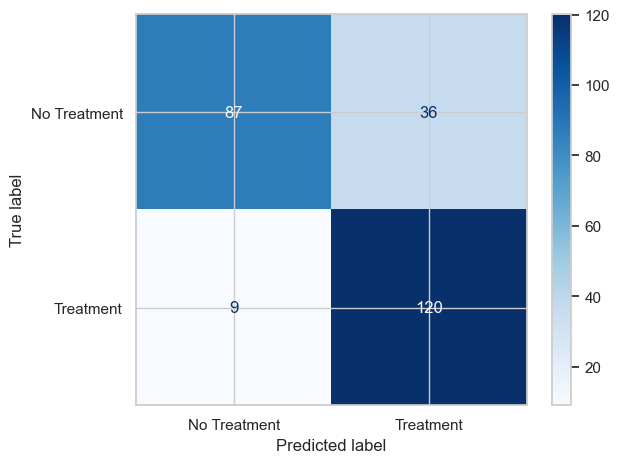

In [338]:
def visualize_confusing_matrix():
    # Create a confusing matrix
    cfsn_matrix = confusion_matrix(y_test, y_pred, labels=decision_tree_model.classes_)
    cfsn_display = ConfusionMatrixDisplay(confusion_matrix=cfsn_matrix, display_labels=['No Treatment', 'Treatment'])
    cfsn_display.plot(cmap='Blues')
    plt.tight_layout()
    plt.show()

visualize_confusing_matrix()

The confusing matrix displays the model's predictions on the test set compared to the actual labels.

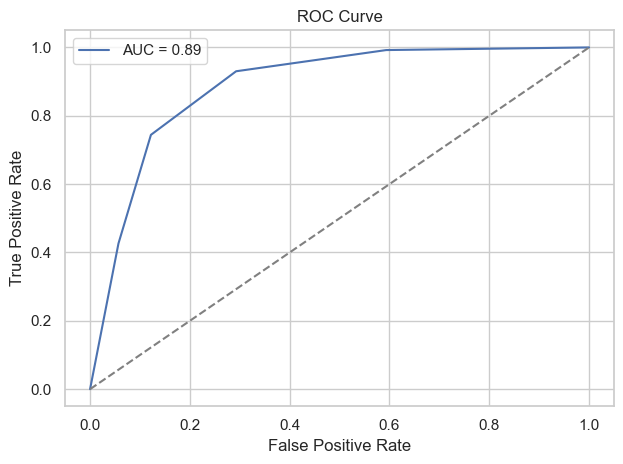

In [339]:
def visualize_roc_curve():
    # Use the trained decision tree model to predict the probability 
    # that the test set sample belongs to the positive class
    y_pred_proba = decision_tree_model.predict_proba(X_test)[:, 1]
    # True Positive Rate (TPR) and False Positive Rate (FPR)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Draw roc curve
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_roc_curve()

The ROC curve shows that the model has good classification ability.

## 7. Graphical User Interface

In [340]:
def predict_treatment(input_features, scaler, model):
    input_df = pd.DataFrame([input_features], columns=['work_interfere', 'family_history', 'care_options', 
                                                       'Age', 'no_employees', 'leave', 'benefits', 'Gender'])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return 'Needs Treatment' if prediction[0] == 1 else 'Does Not Need Treatment'


In [341]:
# Mapping prediction values to meaningful labels
prediction_labels = {
    0: "Does Not Need Treatment",
    1: "Needs Treatment"
}

# Model Selector
model_selector = widgets.Dropdown(
    options=[('Decision Tree', 'Decision Tree'), 
             ('KNN', 'KNN'), 
             ('Logistic Regression', 'Logistic Regression'), 
             ('SVC', 'SVC')],
    value='Decision Tree',
    description='Select Model:',
    tooltip='Choose a machine learning model for prediction'
)

# Just some explanotory text ....
display(HTML("<h3>Employee Mental Health Prediction</h3>"))
display(HTML("<p><strong>Instructions:</strong> Use the sliders, buttons, and fields below to input data about the employee's mental health and workplace conditions. Hover over the labels for more information.</p>"))

# Input widgets
work_interfere = widgets.IntSlider(
    value=0, min=0, max=4,
    description='Work Interfere:',
    tooltip='How often does mental health interfere with work? (0 = Never, 4 = Always)'
)

family_history = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='Family History:',
    tooltip='Does the employee have a family history of mental health issues?'
)

care_options = widgets.ToggleButtons(
    options=[('Not Available', 0), ('Somewhat', 1), ('Easily', 2)],
    description='Care Options:',
    tooltip='How accessible are mental health care options?'
)

age = widgets.FloatText(
    value=25,
    description='Age:',
    tooltip='Employee age in years'
)

no_employees = widgets.IntSlider(
    value=0, min=0, max=5,
    description='Company Size:',
    tooltip='Size of the company: 0 = 1-5 employees, 5 = 500+ employees'
)

leave = widgets.ToggleButtons(
    options=[('Very Difficult', 0), ('Somewhat Difficult', 1), ('Easy', 2)],
    description='Leave Policy:',
    tooltip='How easy is it to take time off for mental health reasons?'
)

benefits = widgets.ToggleButtons(
    options=[('No Benefits', 0), ('Some Benefits', 1), ('Good Benefits', 2)],
    description='Benefits:',
    tooltip='How comprehensive are the employee benefits?'
)

gender = widgets.ToggleButtons(
    options=[('Male', 0), ('Female', 1)],
    description='Gender:',
    tooltip='Employee gender'
)

# Display widgets
display(model_selector, work_interfere, family_history, care_options, age, no_employees, leave, benefits, gender)

# Prediction button and output area
predict_button = widgets.Button(description="Predict")
output = widgets.Output()

def on_predict_clicked(b):
    input_features = [
        work_interfere.value,
        family_history.value,
        care_options.value,
        age.value,
        no_employees.value,
        leave.value,
        benefits.value,
        gender.value
    ]
    
    # Dictionaries have already been defined / if we look at the above jupyter cells
    selected_model_name = model_selector.value
    selected_model = models[selected_model_name]  
    
    # Base it
    prediction = selected_model.predict([input_features])[0]  
    prediction_label = prediction_labels.get(prediction, "Unknown")
    
    # with already has a try catch so i dont need to worry too much
    with output:
        output.clear_output()
        print(f"Prediction using {selected_model_name}: {prediction_label}")

predict_button.on_click(on_predict_clicked)

# Display the predict button and output area
display(predict_button, output)

Dropdown(description='Select Model:', options=(('Decision Tree', 'Decision Tree'), ('KNN', 'KNN'), ('Logistic …

IntSlider(value=0, description='Work Interfere:', max=4, tooltip='How often does mental health interfere with …

ToggleButtons(description='Family History:', options=(('No', 0), ('Yes', 1)), tooltip='Does the employee have …

ToggleButtons(description='Care Options:', options=(('Not Available', 0), ('Somewhat', 1), ('Easily', 2)), too…

FloatText(value=25.0, description='Age:', tooltip='Employee age in years')

IntSlider(value=0, description='Company Size:', max=5, tooltip='Size of the company: 0 = 1-5 employees, 5 = 50…

ToggleButtons(description='Leave Policy:', options=(('Very Difficult', 0), ('Somewhat Difficult', 1), ('Easy',…

ToggleButtons(description='Benefits:', options=(('No Benefits', 0), ('Some Benefits', 1), ('Good Benefits', 2)…

ToggleButtons(description='Gender:', options=(('Male', 0), ('Female', 1)), tooltip='Employee gender', value=0)

Button(description='Predict', style=ButtonStyle())

Output()

# Project Outcome


## Overview of Results

This project analyses employee mental health, create machine learning models, and offers organisations an intuitive GUI to help identify employees that may require mental health support. We defined four objectives to measure our results.

For objective 1, the dataset was refined by removing unnecessary columns, handling missing values, and standardizing the "Gender" column. Outliers in the "Age" column were treated using the IQR method. These steps resulted in a consistent, reliable dataset for analysis.

For objective 2, visualizations demonstate key factors influencing mental health, such as gender, age, company size, and family history. Notably, younger employees (20–30 years) had higher mental health concerns, and smaller companies offered fewer benefits. Gender differences in seeking treatment were also significant.

For objective 3, classification models, like Decision Tree and KNN, were created to predict the likelihood of employees seeking mental treatment. The Decision Tree model achieved the best performance (F1 score: 0.85, recall: 0.93).

For objective 4, a GUI was built for organizations to predict mental health treatment needs using pre-trained models. User inputs are stored for further analysis. 

Overall, the project successfully combined analysis, modeling, and interactive tools to address workplace mental health challenges.

## Objective 1

The data cleaning process improved dataset quality by removing unnecessary columns, addressing missing values, and standardizing the "Gender" column into clear categories. Outliers in the "Age" column were handled using the IQR method to ensure data accuracy. These steps resulted in a consistent and refined dataset, ready for reliable analysis and modeling of workplace mental health trends.

### Explanation of Results

This section outlines the data cleaning steps applied to the original survey dataset, which includes information on mental health in the workplace. The objective was to standardize, clean, and preprocess the data to ensure accuracy for further analysis. Details are as follows.

1.	After reloading the dataset (1259 rows, 27 columns), unnecessary columns such as ‘Timestamp,’ ‘Country,’ ‘state,’ and ‘comments’ were removed to streamline the analysis.
2.	Missing values were handled by coding a function to identify missing columns, and the missing values were replaced or filled with placeholders such as ‘Unknown,’ ‘NaN,’ or ‘No.’
3.	The “Gender” column was cleaned by standardizing varied gender entries into clear categories: Male, Female, transMale, transFemale, and Other.
4.	Outliers in the “Age” column were identified and removed using the Interquartile Range (IQR) method. This involved calculating the upper and lower bounds, with any values outside these bounds treated as outliers to ensure data accuracy.

Briefly, these cleaning steps resulted in a refined dataset, which is ready for further analysis and modeling.

### Visualisation

**Figure 1**

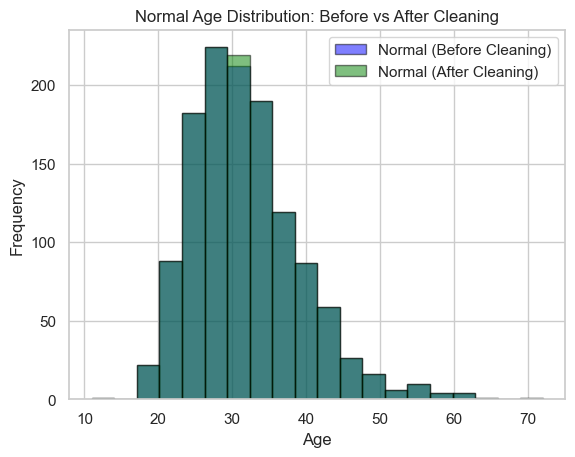

In [342]:
compare_age_cleaned(df)

Figure 1 shows that after cleaning (green bars), the age distribution becomes more focused, with any borderline or misclassified values removed.The visualizations reveal that the data cleaning process has successfully improved the dataset’s quality by focusing the age distribution within the realistic range and eliminating unrealistic entries.

**Figure 2**

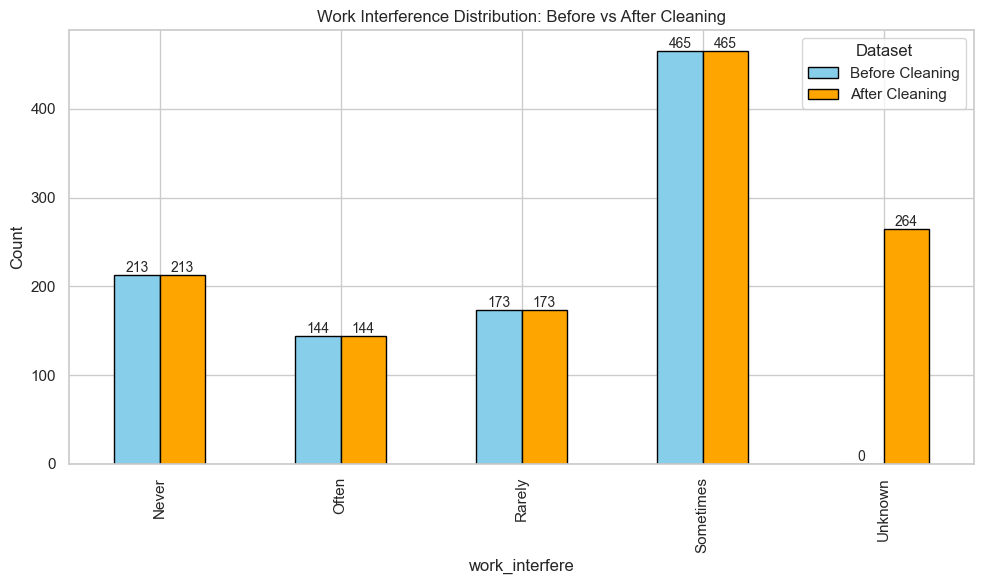

In [343]:
compare_workinterfere_cleaned(df)


Figure 2 compares work interference distributions before and after cleaning. The "Unknown" category was introduced post-cleaning to account for missing values, while other categories remained unchanged, ensuring data completeness and consistency.

**Figure 3**

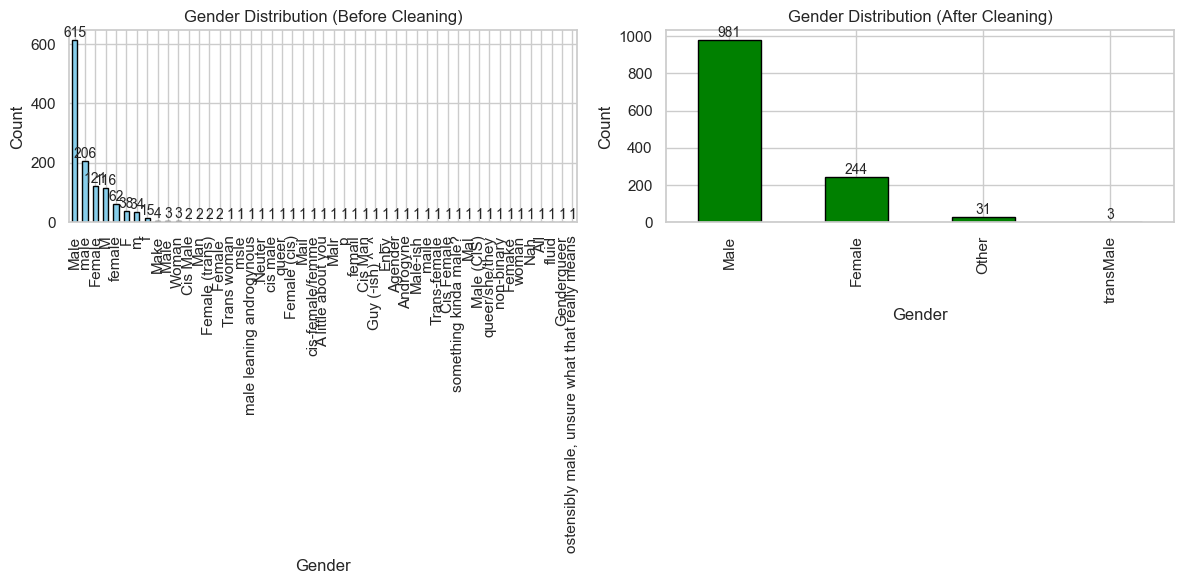

In [344]:
compare_gender_cleaned(df)


Figure 3 shows that before cleaning, the "Gender" column contains a wide range of inconsistent entries. After cleaning, the gender categories were standardized into "Male," "Female," "Other," and "transMale," significantly improving data clarity and consistency.

## Objective 2

In this section an in-depth exploratory data analysis was conducted to understand the dataset and explore the factors that influence mental health. Visualizations such as stacked bar charts, grouped bar charts, and pie charts were utilized to reveal the proportions and distributions of different populations.

### Explanation of Results

In this section of the analysis, we explored the factors in the dataset that are associated with employee mental health, primarily through a variety of visualizations, with the aim of providing insights for subsequent modeling and analysis. By visualizing and analyzing variables such as gender, age, job interference, company size, and family history, we identified several interesting trends.

The gender distribution plot shows that males dominate the dataset, with lower percentages of females, trans men, and other gender groups. The distribution of mental health treatment shows that females and other gender groups are overrepresented in treatment seeking, demonstrating the significant influence of gender in mental health treatment decisions.

The age distribution, on the other hand, showed the highest proportion in the group of 20 to 30 years old, implying that younger employees may have a higher level of concern in mental health issues. In addition, work interference showed a relationship with age, with the younger employee group showing a higher percentage of work interference and the older employees having a lower percentage of interference.

In terms of company size, smaller companies tended to offer fewer mental health benefits, while larger companies showed a higher percentage of benefit offerings, especially among companies with more than 1,000 employees, where coverage of mental health benefits was significantly higher.

Finally, family history and technology company employees also showed some differences in mental health treatment and benefits. Overall, these visual analyses reveal a variety of key factors that may influence employee mental health, providing a valuable reference for building effective predictive models.

### Visualisation

**Figure 4**

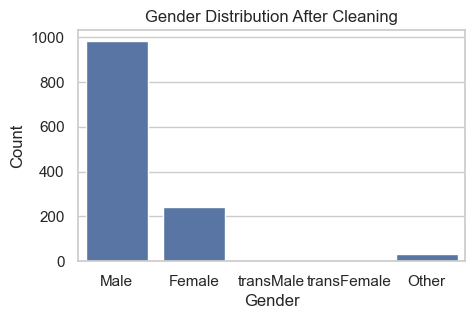

In [345]:
visualize_gender_distribution(df)

Figure 4 shows that males are in the majority, with close to 1,000 individuals. There are significantly fewer females, about 200. There are very few cross-male, cross-female and other gender entries.

**Figure 5**

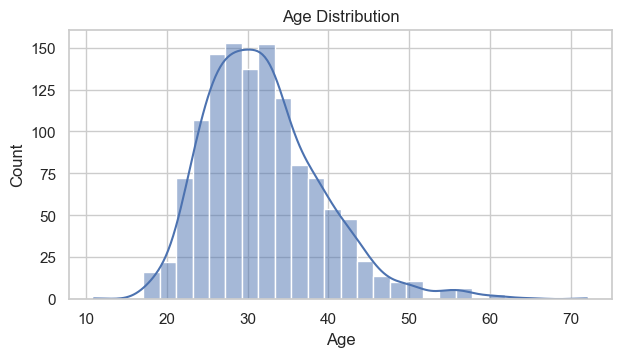

In [346]:
visualize_age_distribution(df)

Figure 5 shows that the majority of individuals are between the ages of 20 and 40, with a positively skewed distribution (right tail). The peak occurs around the age of 30, with nearly 150 individuals, and the number of individuals decreases with age. there are very few individuals over the age of 60, indicating that the dataset consists mainly of young and middle-aged individuals.

**Figure 6**

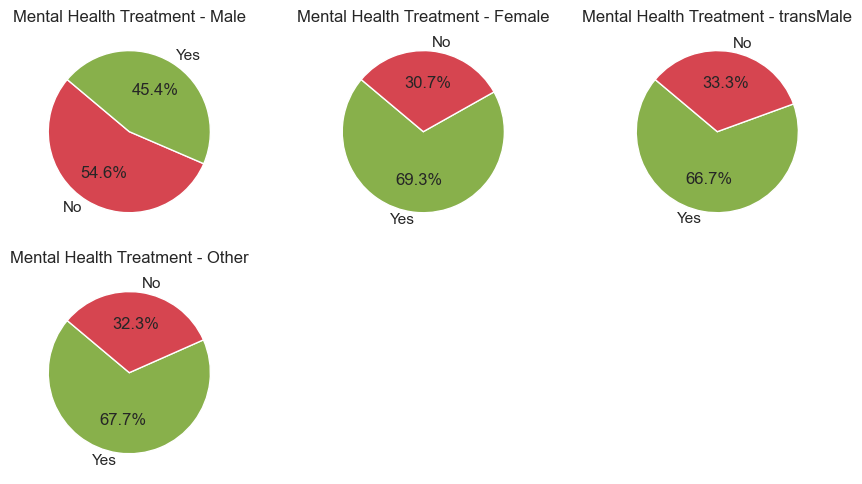

In [347]:
visualize_pie_charts_by_gender(df, color_dict)

Figure 6 shows a higher proportion of women and transgender people seeking mental health treatment than men, and a relatively low proportion of men seeking mental health treatment.

**Figure 7**

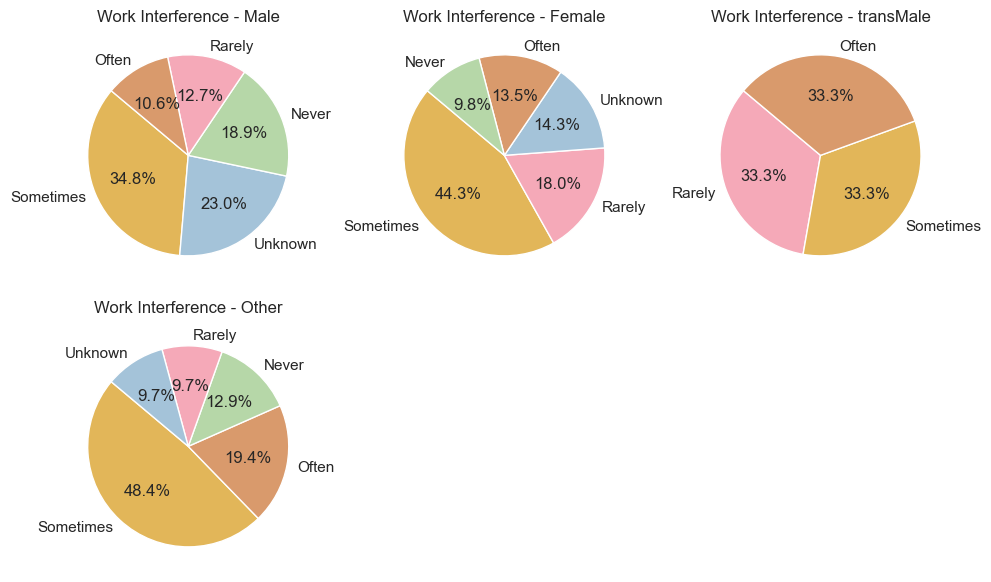

In [348]:
visualize_work_interference(df, color_dict)

Figure 7 reveals differences between genders in how mental health problems interfere with work. Among women, “never” (9.8%) is the least common, suggesting that women are less likely to report no interference at all. “Often” was 13.5%, slightly higher than for men.

**Figure 8**

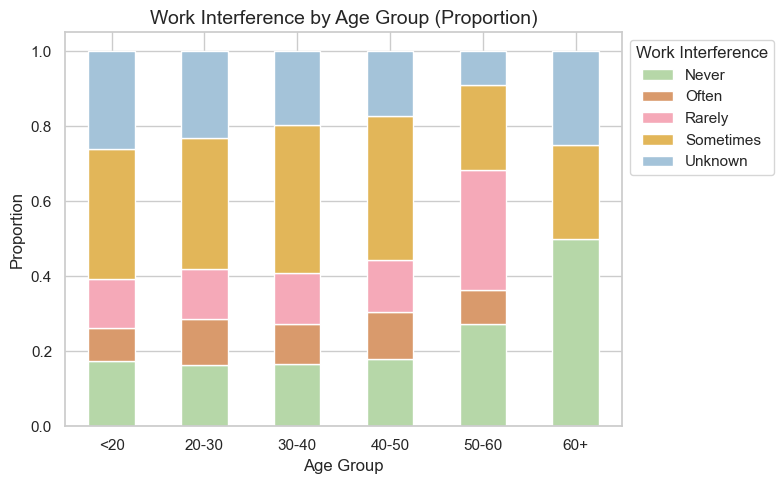

In [349]:
visualize_age_group_distribution(df, bins, labels, color_dict)

Figure 8 shows some differences in mental health status in relation to work disruptions between age groups, with older people(60+) appearing to experience fewer disruptions and younger and middle-aged groups(20-40) experiencing a higher proportion of disruptions.

**Figure 9**

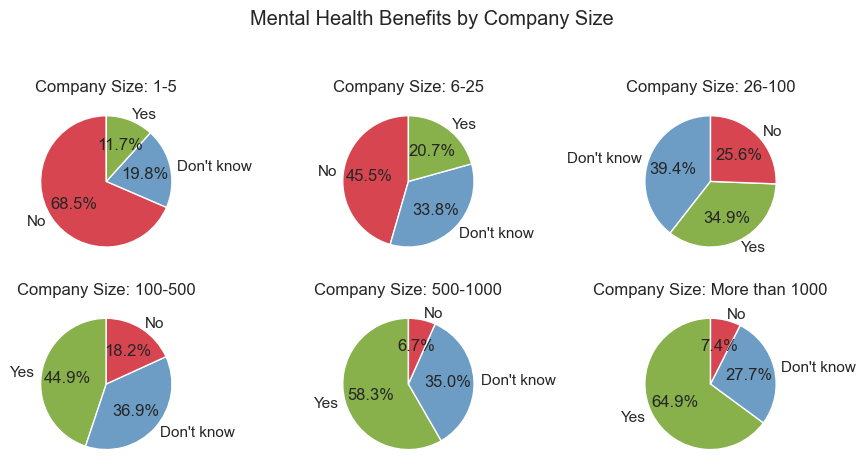

In [350]:
visualize_company_size_vs_benefits(df, employee_order, color_dict)

Figure 9 shows the distribution of responses from employees at companies of different sizes about whether their employer offers mental health benefits. The likelihood of an employer offering mental health benefits increases significantly as the size of the company increases, especially at companies with more than 500 employees. In contrast, employees at smaller companies (1-25 employees) are more likely to say that mental health benefits are not available or are unsure if they are available.

**Figure 10**

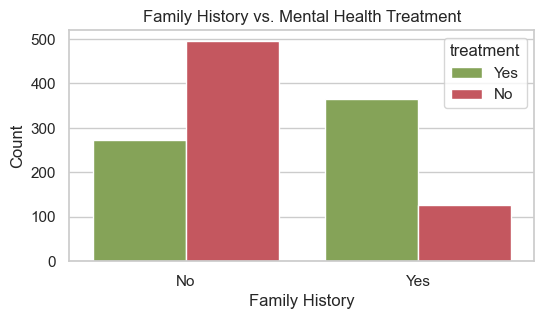

In [351]:
visualize_family_history_vs_treatment(df, color_dict)

Figure 10 shows that individuals with a family history of mental health problems are much more likely to seek mental health treatment, while those without a family history are much less likely to seek mental health treatment. This suggests that having a family history may be an important factor in treatment-seeking behavior.

**Figure 11**

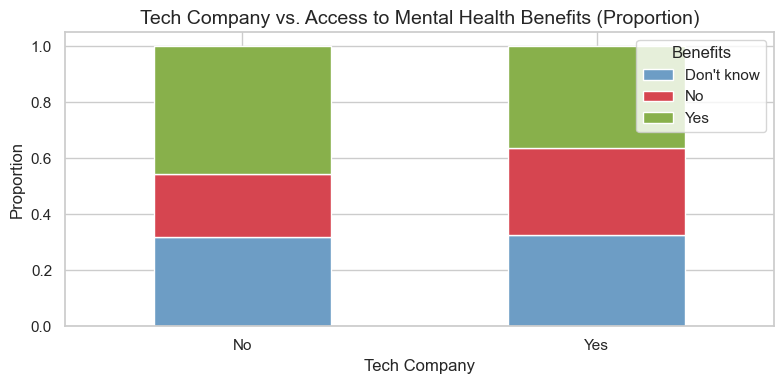

In [352]:
visualize_tech_vs_benefits(df, color_dict)

Figure 11 demonstrates that a higher percentage of tech companies offer mental health benefits compared to non-tech companies. Apparently tech companies offer more mental health benefits. In both types of companies, about 25% of employees are unsure about the availability of mental health benefits.

## Objective 3

Encode data and scale feature. Train and evaluate classification models, e.g. Decision Tree and KNN - to predict whether an employee are likely to seek mental health treatment based on specific features. The evaluation stage involves analysing the model's accuracy, recall, and precision to determine its effectiveness.

### Explanation of Results

The aim of this section is to train a machine learning model to predict whether an employee in a company needs mental health treatment. 

To build this model, we first encoded and scaled the features of the preprocessed dataset. Then, we applied a Random Forest model to assess the importance of variables with respect to the treatment label. We found that the columns like "work_interfere," "family_history," "care_options," "Age,"  were significantly related to the treatment label.

Using these variables, we applied four supervised learning algorithms, including Decision Tree and K-Nearest Neighbors (KNN), and evaluated their performance using F1 scores. The Decision Tree model achieved an F1 score of 0.85, demonstrating a strong balance between identifying positive cases and minimizing false positives. The SVC model followed closely with an F1 score of 0.80, while both KNN and Logistic Regression scored below 0.75, indicating limited effectiveness in this task.

We then further evaluated the Decision Tree model on the test set, using accuracy, precision, and recall as metrics. The model achieved a recall of 0.93, showing strong capability in identifying employees who need mental health treatment. An accuracy of 0.77 suggested a moderate rate of false positives, while a precision of 0.82 reflected above-average reliability.  Overall, these results indicate that the model has good performance in the current task.


### Visualisation

**Figure 12**

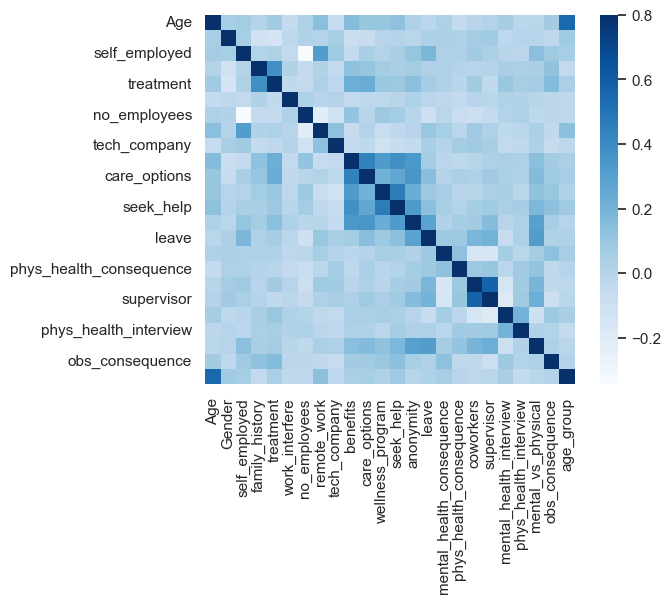

In [353]:
visualize_coefficient_matrix()

Figure 12 shows a heat map that demonstrate the correlation between different variables.

**Figure 13:**

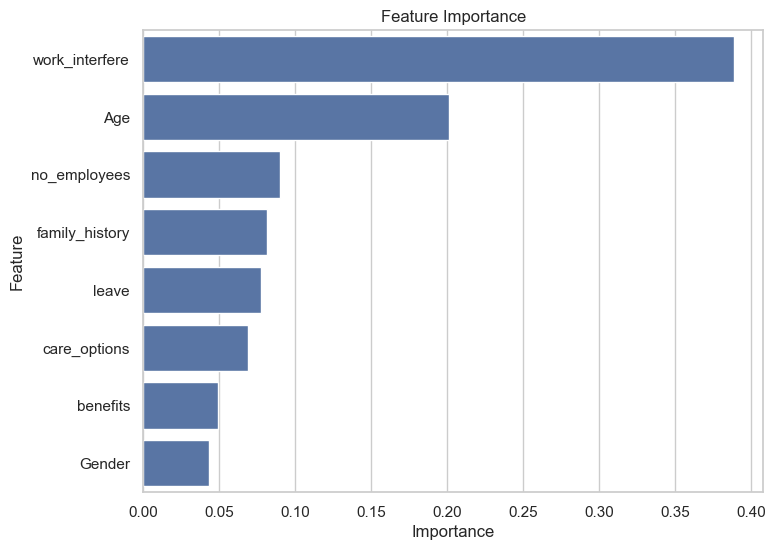

In [354]:
visualize_feature_importance()

Figure 13 shows a bar chart of feature importance. We selected the top 8 important variables to train the machine learning models.

**Figure 14**

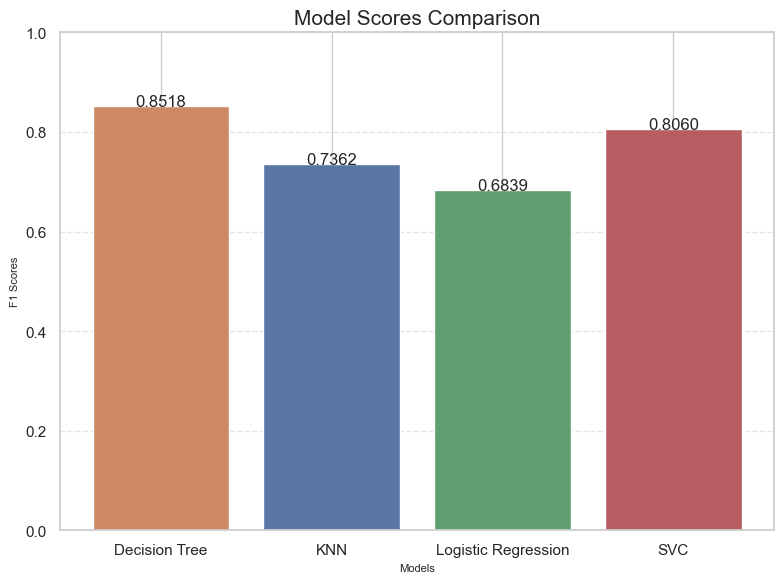

In [355]:
visualize_model_scores()

Figure 14 shows the F1 scores of different models.
From plot we can observe that the Decision Tree Model has highest F1 scores, showing a strong balance between identifying positive cases and minimizing false positives.

**Figure 15**

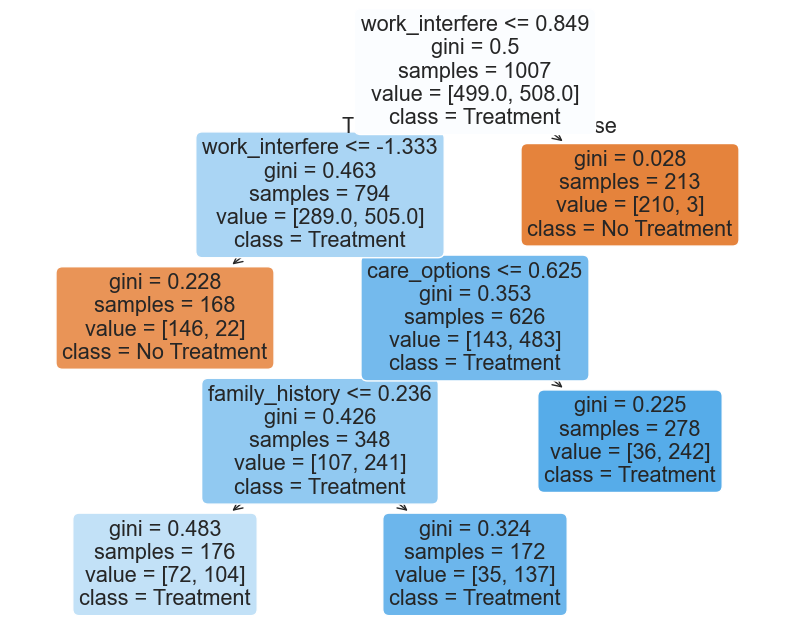

In [356]:
visualize_decision_tree()

Figure 15 shows the visualization of the decision tree. It can be observed from the figure that work_interfere is the main basis for division, which is consistent with the feature importance data calculated by random forest model. Most of the leaf nodes have low Gini coefficients, indicating that the decision tree has a high classification ability on the training set.

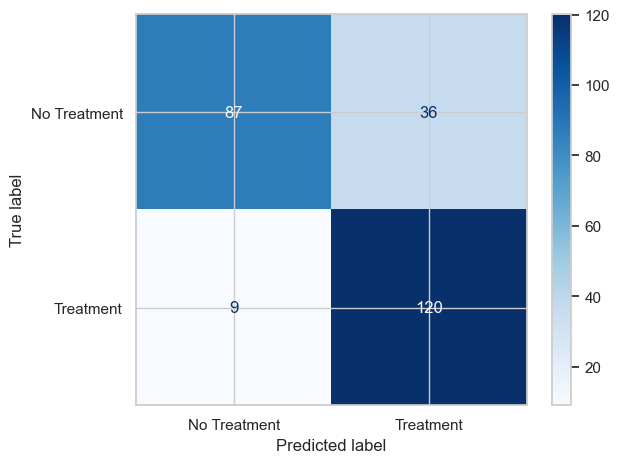

In [357]:
visualize_confusing_matrix()

Figure 15 demonstrates a confusion matrix of Decision Tree model. The recall = TP/(TP + FN) = 0.93, this shows that the model has a strong ability to identify employees who need mental treatment. The precision = TP/(TP + FP) = 0.77, which indicates that there is a certain amount of false positives when predicting Treatment. The overall model accuracy = (TP + TN)/ Total number of samples = 0.82.

**Figure 16**

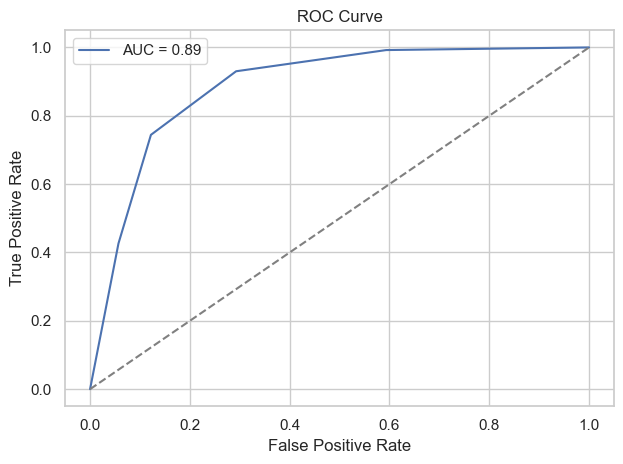

In [358]:
visualize_roc_curve()

Figure 16 illustrates the ROC curve of Decision Tree model. The ROC curve is far from the diagonal line (the performance of random guessing) and performs well in the high TPR and low FPR areas, showing that the model can effectively distinguish the two categories. The AUC is 0.89, indicating that the model has strong classification ability.

## Objective 4 
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### References

Bauhoff, S. 2023. Self-Report Bias in Estimating Cross-sectional and Treatment Effects. Springer eBooks., pp.6277–6279.

Cher, H. 2024. [Product Update] New Usability Rating User Experience | Kaggle. Kaggle.com. [Online]. [Accessed 26 November 2024]. Available from: https://www.kaggle.com/discussions/product-feedback/372061.

‌globalEdge. 2018. International Journal of Psychology. International Journal of Psychology.

Mitravinda, K.M., Nair, D.S. and Srinivasa, G. 2023. Mental Health in Tech: Analysis of Workplace Risk Factors and Impact of COVID-19. SN Computer Science. 4(2).

‌

‌
### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._